# 02. PyTorch Neural Network Classification

Book Version of this course : https://www.learnpytorch.io/02_pytorch_classification/

## 1. Make Classification data and get ready

In [525]:
import sklearn

In [526]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create Circles
X, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state=35 )

In [527]:
len(X), len(y)

(1000, 1000)

In [528]:
print(f"5 Samples of X : \n{X[:5]}\n\n5 Samples of y \n{y[:5]}")

5 Samples of X : 
[[-0.4670712  -0.70384742]
 [ 0.04924033  0.80945133]
 [-0.14835946  0.84169802]
 [ 0.56773862 -0.49541508]
 [-0.43944013 -0.70298314]]

5 Samples of y 
[1 1 1 1 1]


In [529]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame( {"X1" : X[:, 0],
                        "X2" : X[:,1],
                        "label" : y} )

circles.sample(10)

,X1,X2,label
650,-0.938530,-0.368576,0
673,0.081954,0.979503,0
181,-1.032449,0.136364,0
477,-0.321400,0.980819,0
956,-0.720571,0.375624,1
985,-0.545122,0.806191,0
951,-0.446263,0.592448,1
596,-0.103761,0.930714,0
198,-0.531602,-0.850732,0
446,-0.354234,-0.750799,1


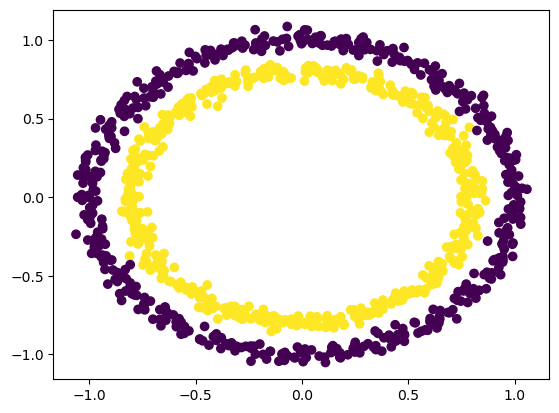

In [530]:
# Visualize
import matplotlib.pyplot as plt
plt.scatter(x = X[:,0],
            y = X[:,1],
            c=y)
            

### 1.1 Check input and output shape and also have to convert them into tensor

In [531]:
X.shape, y.shape

((1000, 2), (1000,))

In [532]:
import torch

torch.__version__

'2.6.0'

In [533]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [534]:
# Converting numpy datadframe into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [535]:
# Check the current dtype
type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [536]:
# Split the dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [537]:
len(X_train), len(X_test)

(800, 200)

In [538]:
n_samples

1000

## 2. Building the model

In [539]:
# Import pytorch and nn
import torch
from torch import nn

# Make device agnostic code 
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

In [540]:
X_train

tensor([[ 0.7895, -0.1892],
        [-0.4549,  0.9372],
        [-0.8302,  0.5411],
        ...,
        [-0.7802, -0.5686],
        [ 0.1442, -0.9822],
        [-0.6683, -0.7156]])

### Parts and order of the model - Writing for my understanding

We have set up device agnostic code, 

1. Subclassess nn.Module
2. Create 2 nn.linear layers
3. Define a forward() method (overwrite it) that outlines the forward pass ( logic of how calculation would take place) of the model
4. Instatiate an instance of our model class and send it to the target device

In [541]:
# 1.  Construct a model that subclasses nn.Module
class CircleModelv0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 layers because one layer can only do linear classification on that have a straight line as boundary
        self.layer_1 = nn.Linear(in_features = 2, out_features = 5)
        self.layer_2 = nn.Linear(in_features = 5, out_features = 1)

    # 3. Define the forward method that define forward pass
    def forward(self, x):
        return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2

# 4. Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelv0().to(device)
model_0

CircleModelv0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [542]:
# Let's replicate this using Sequential

model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=5)
).to(device)

In [543]:
# # Another way to write it using Sequential

# # 1.  Construct a model that subclasses nn.Module
# class CircleModelv0(nn.Module):
#     def __init__(self):
#         super().__init__()
# #        # 2. Create 2 layers because one layer can only do linear classification on that have a straight line as boundary
# #        self.layer_1 = nn.Linear(in_features = 2, out_features = 5)
# #        self.layer_2 = nn.Linear(in_features = 5, out_features = 1)
#         self.two_linear_layers = nn.Sequential(
#             nn.Linear(in_features=2, out_features=5),
#             nn.Linear(in_features=5, out_features=1)
#         )

#     # 3. Define the forward method that define forward pass
#     def forward(self, x):
# #        return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2
#         return self.two_linear_layers(x)

# # 4. Instantiate an instance of our model class and send it to the target device
# model_0 = CircleModelv0().to(device)
# model_0

CircleModelv0(
  (two_linear_layers): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [544]:
# 1.  Construct a model that subclasses nn.Module
class CircleModelv0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 layers because one layer can only do linear classification on that have a straight line as boundary
        self.layer_1 = nn.Linear(in_features = 2, out_features = 5)
        self.layer_2 = nn.Linear(in_features = 5, out_features = 1)

    # 3. Define the forward method that define forward pass
    def forward(self, x):
        return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2

# 4. Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelv0().to(device)
model_0

CircleModelv0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [545]:
# 1.  Construct a model that subclasses nn.Module
class CircleModelv0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 layers because one layer can only do linear classification on that have a straight line as boundary
        self.layer_1 = nn.Linear(in_features = 2, out_features = 5)
        self.torch.nn.ReLU()
        self.layer_2 = nn.Linear(in_features = 5, out_features = 2)
        self.torch.nn.ReLU()
        self.layer_3 = nn.Linear(in_features = 2, out_features = 1)

    # 3. Define the forward method that define forward pass
    def forward(self, x):
        return self.layer_3(self.layer_2(self.layer_1(x))) # x -> layer_1 -> layer_2 -> layer 3

# 4. Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelv0().to(device)
model_0

AttributeError: 'CircleModelv0' object has no attribute 'torch'

In [ ]:
model_0.state_dict()

In [ ]:
# make predictions
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
print(f"length of predictions : {len(untrained_preds)}")
print(f"length of test samples : {len(X_test)}, shape : {X_test.shape}")
print(f"\n First 10 Predictions :\n{untrained_preds[:10]}")
print(f"\n First 10 Test :\n{y_test[:10]}")

### 2.1 Setup loss function and optimizer

Which loss function and optimizer should one use?abs

Depends on the problem you are solving

For example for regression you might want MAE or MSE

For Binary Classification  - You may need Binary Cross Entropy

As a remineder loss function measure how wrong the model predictions are

For optimizer, two most common optimizer are SGD, AdamW and lot more on Pytorch site

* For the loss function we are going to use `torch.nn.BECWithLogitsLoss()`


In [ ]:
# Set up the loss function 

loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.01)

In [ ]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred))*100
    return acc

# 3. Training the Model

To train the model we need to create the loop 

1. Forward pass
2. Calculate the loss
2. Optimiser zero grad
4. Loss Backwards (backpropagation)
5. Optimizer step

### 3.1 Going from raw logits -> prediction probabilities -> prediction labels

our model outputs are going to be raw **logits**.

We can convert these **logits** into **prediction probabilities** by passing them to some kind of activation function (e.g sigmoid for binary classification and softmax for multiclass classification)

Then we can convert out models predictions probabilities to **prediction Labels** by either rounding them(sigmoid) or taking the `argmax()`(softmax)

In [ ]:
model_0

In [ ]:
model_0.state_dict()

In [ ]:
# View the first 5 outputs of the forward pass on the test data
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]
y_logits

In [ ]:
y_test[:5]

In [ ]:
# Use the sigmoid activation on the model logits -> probabilities

y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

In [ ]:
y_round = torch.round(y_pred_probs)
y_round

In [ ]:
# Find the predicted labels
y_preds = torch.round(y_pred_probs)
print(y_preds)
# In full 
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# Check for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

# Get rid of extra dimension
y_preds.squeeze()

### Building the model 

In [ ]:
X_test.to(device)
y_test.to(device)
X_train.to(device)
y_train.to(device)

In [ ]:
model_0.to(device)

### End-to-end mental model (this is the “click”)

One training step means:

1. Forward → make a prediction

2. Loss → measure error

3. Backward → assign blame

4. Step → fix weights

5. Zero grad → forget past blame

Nothing magical. Just bookkeeping + calculus.

In [ ]:
for name, param in model_0.named_parameters():
    print(name)
    print(param.data)
    print(param.grad)
    print(param.shape,"\n")
#    print(param.grad.shape, "\n")


In [ ]:
X_test = X_test.to(device)
y_test = y_test.to(device)
X_train = X_train.to(device)
y_train = y_train.to(device)
model_0.to(device)

In [ ]:


torch.cuda.manual_seed(55)

# nUmber of loops on whole dataset 
epochs = 10000

for epoch in range(epochs):

    # Put the model in training mode
    model_0.train()

    # Put the model in forward pass
    y_logits = model_0(X_train).squeeze()
    y_prediction = torch.round(torch.sigmoid(y_logits))
    
    # Calculate the loss
    loss = loss_fn(y_logits, y_train) # nn.BCEWithLogitsLoss expects raw logits as input
    acc = accuracy_fn(y_true = y_train, y_pred = y_prediction)
    
    # clears old gradients so that the next backward pass starts fresh. - 
    optimizer.zero_grad()

    # Figure out who’s responsible for the error - compute gradients - backward propagation - It produces a blame report, not a fix.
    loss.backward()

    # Actually fix the weights -
    optimizer.step()

    # Testing
    model_0.eval()
    
    with torch.inference_mode():
        # 1. Forward Pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
    
        # Calculate the loss
        test_loss = loss_fn( test_logits, y_test)
        test_acc = accuracy_fn(y_true = y_test, y_pred=test_pred)
    
    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch :{epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss : {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

### 4. Visualize - Visualize - Visualize

From the metrics it's look like our model is not learning anything

so to inspect let's make them visual 

In [ ]:
import requests
from pathlib import Path

# Download helper function from the learn pytorch repo
if Path("helper_functions.py").is_file():
    print("it exists")
else :
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary 

In [ ]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)

plt.title("Train")

plot_decision_boundary(model_0, X_train, y_train)

plt.subplot(1, 2, 2)

plt.title("Test")

plot_decision_boundary(model_0, X_test, y_test)

### 5. Imporving the Model  - From Model Prespective

* Adding More Layers
* Adding More Hidden Units ( Neurons )
* Fit for Longer - More epochs
* Chang the activation functions
* Change the learning rate
* Change the loss function

These options deals with model rather then data - Hence **HyperParameters**

In [546]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.1445, -0.4406],
                      [-0.5431,  0.4718],
                      [ 0.3476, -0.0082],
                      [-0.5050,  0.5612],
                      [-0.5069, -0.7032]], device='cuda:0')),
             ('layer_1.bias',
              tensor([ 0.3934, -0.3899,  0.0162, -0.5545,  0.4470], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.2059,  0.2541, -0.0623, -0.2795,  0.3902]], device='cuda:0')),
             ('layer_2.bias', tensor([-0.4270], device='cuda:0'))])

### We can 
1. increase the count of neuron
2. increadr the number of hidden layer
3. Chnage the loss function

In [549]:
# 1.  Construct a model that subclasses nn.Module
class CircleModelv1(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 layers because one layer can only do linear classification on that have a straight line as boundary
        self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
        self.layer_2 = nn.Linear(in_features = 10, out_features = 2)
        self.layer_3 = nn.Linear(in_features = 2, out_features = 1)

    # 3. Define the forward method that define forward pass
    def forward(self, x):
        return self.layer_3(self.layer_2(self.layer_1(x))) # x -> layer_1 -> layer_2 -> layer_3

# 4. Instantiate an instance of our model class and send it to the target device
model_1 = CircleModelv1().to(device)
model_1

CircleModelv1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=2, bias=True)
  (layer_3): Linear(in_features=2, out_features=1, bias=True)
)

In [553]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.3966,  0.1620],
                      [-0.6250,  0.2045],
                      [-0.0036, -0.6933],
                      [-0.3269,  0.4432],
                      [-0.5024,  0.1843],
                      [ 0.4761,  0.5437],
                      [-0.2234, -0.0300],
                      [-0.3712, -0.4865],
                      [-0.3722,  0.3672],
                      [ 0.5809,  0.4648]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.1746, -0.4704,  0.6027, -0.5868,  0.5403,  0.1969, -0.6328,  0.1575,
                      -0.2626,  0.1789], device='cuda:0')),
             ('layer_2.weight',
              tensor([[-0.0188, -0.2637,  0.1969,  0.2187, -0.0942, -0.2697,  0.0785, -0.1758,
                        0.2860, -0.1606],
                      [ 0.0949,  0.1375,  0.1765, -0.1607,  0.1708,  0.1048,  0.0813,  0.1849,
                       -0.2380,  0.1525]], device='cuda:0')),
             ('lay

In [554]:
for name, param in model_1.named_parameters():
    print(name)
    print(param.data)
    print(param.grad)
    print(param.shape,"\n")
#    print(param.grad.shape, "\n")


layer_1.weight
tensor([[-0.3966,  0.1620],
        [-0.6250,  0.2045],
        [-0.0036, -0.6933],
        [-0.3269,  0.4432],
        [-0.5024,  0.1843],
        [ 0.4761,  0.5437],
        [-0.2234, -0.0300],
        [-0.3712, -0.4865],
        [-0.3722,  0.3672],
        [ 0.5809,  0.4648]], device='cuda:0')
None
torch.Size([10, 2]) 

layer_1.bias
tensor([-0.1746, -0.4704,  0.6027, -0.5868,  0.5403,  0.1969, -0.6328,  0.1575,
        -0.2626,  0.1789], device='cuda:0')
None
torch.Size([10]) 

layer_2.weight
tensor([[-0.0188, -0.2637,  0.1969,  0.2187, -0.0942, -0.2697,  0.0785, -0.1758,
          0.2860, -0.1606],
        [ 0.0949,  0.1375,  0.1765, -0.1607,  0.1708,  0.1048,  0.0813,  0.1849,
         -0.2380,  0.1525]], device='cuda:0')
None
torch.Size([2, 10]) 

layer_2.bias
tensor([ 0.3083, -0.0419], device='cuda:0')
None
torch.Size([2]) 

layer_3.weight
tensor([[0.5000, 0.0458]], device='cuda:0')
None
torch.Size([1, 2]) 

layer_3.bias
tensor([0.2239], device='cuda:0')
None
torc

In [555]:
# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create a optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.01)

In [557]:
X_test = X_test.to(device)
y_test = y_test.to(device)
X_train = X_train.to(device)
y_train = y_train.to(device)
model_1.to(device)

CircleModelv1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=2, bias=True)
  (layer_3): Linear(in_features=2, out_features=1, bias=True)
)

In [558]:
torch.cuda.manual_seed(55)

# nUmber of loops on whole dataset 
epochs = 10000

for epoch in range(epochs):

    # Put the model in training mode
    model_1.train()

    # Put the model in forward pass
    y_logits = model_1(X_train).squeeze()
    y_prediction = torch.round(torch.sigmoid(y_logits))
    
    # Calculate the loss
    loss = loss_fn(y_logits, y_train) # nn.BCEWithLogitsLoss expects raw logits as input
    acc = accuracy_fn(y_true = y_train, y_pred = y_prediction)
    
    # clears old gradients so that the next backward pass starts fresh. - 
    optimizer.zero_grad()

    # Figure out who’s responsible for the error - compute gradients - backward propagation - It produces a blame report, not a fix.
    loss.backward()

    # Actually fix the weights -
    optimizer.step()

    # Testing
    model_1.eval()
    
    with torch.inference_mode():
        # 1. Forward Pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
    
        # Calculate the loss
        test_loss = loss_fn( test_logits, y_test)
        test_acc = accuracy_fn(y_true = y_test, y_pred=test_pred)
    
    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch :{epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss : {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch :0 | Loss: 0.70170, Acc: 51.12% | Test Loss : 0.71991, Test Acc: 45.50%
Epoch :100 | Loss: 0.69659, Acc: 51.12% | Test Loss : 0.70916, Test Acc: 45.50%
Epoch :200 | Loss: 0.69456, Acc: 51.12% | Test Loss : 0.70362, Test Acc: 45.50%
Epoch :300 | Loss: 0.69373, Acc: 51.12% | Test Loss : 0.70058, Test Acc: 45.50%
Epoch :400 | Loss: 0.69337, Acc: 51.25% | Test Loss : 0.69885, Test Acc: 45.50%
Epoch :500 | Loss: 0.69321, Acc: 56.00% | Test Loss : 0.69783, Test Acc: 52.00%
Epoch :600 | Loss: 0.69313, Acc: 59.50% | Test Loss : 0.69721, Test Acc: 55.00%
Epoch :700 | Loss: 0.69308, Acc: 58.88% | Test Loss : 0.69683, Test Acc: 56.00%
Epoch :800 | Loss: 0.69304, Acc: 58.88% | Test Loss : 0.69659, Test Acc: 54.00%
Epoch :900 | Loss: 0.69301, Acc: 58.88% | Test Loss : 0.69644, Test Acc: 54.00%
Epoch :1000 | Loss: 0.69299, Acc: 58.50% | Test Loss : 0.69635, Test Acc: 55.00%
Epoch :1100 | Loss: 0.69296, Acc: 59.13% | Test Loss : 0.69629, Test Acc: 55.00%
Epoch :1200 | Loss: 0.69295, Acc: 59.50%

In [559]:
# 1.  Construct a model that subclasses nn.Module
class CircleModelv1(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 layers because one layer can only do linear classification on that have a straight line as boundary
        self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
        self.layer_2 = nn.Linear(in_features = 10, out_features = 2)
        self.layer_3 = nn.Linear(in_features = 2, out_features = 1)

    # 3. Define the forward method that define forward pass
    def forward(self, x):
        return self.layer_3(self.layer_2(self.layer_1(x))) # x -> layer_1 -> layer_2 -> layer_3

# 4. Instantiate an instance of our model class and send it to the target device
model_1 = CircleModelv1().to(device)
model_1


# Create a loss function
loss_fn = nn.BCEWithLogitsLoss()

# Create a optimizer
optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 0.01)

# Sending everything to device
X_test = X_test.to(device)
y_test = y_test.to(device)
X_train = X_train.to(device)
y_train = y_train.to(device)
model_1.to(device)


torch.cuda.manual_seed(55)

# nUmber of loops on whole dataset 
epochs = 10000

for epoch in range(epochs):

    # Put the model in training mode
    model_1.train()

    # Put the model in forward pass
    y_logits = model_1(X_train).squeeze()
    y_prediction = torch.round(torch.sigmoid(y_logits))
    
    # Calculate the loss
    loss = loss_fn(y_logits, y_train) # nn.BCEWithLogitsLoss expects raw logits as input
    acc = accuracy_fn(y_true = y_train, y_pred = y_prediction)
    
    # clears old gradients so that the next backward pass starts fresh. - 
    optimizer.zero_grad()

    # Figure out who’s responsible for the error - compute gradients - backward propagation - It produces a blame report, not a fix.
    loss.backward()

    # Actually fix the weights -
    optimizer.step()

    # Testing
    model_1.eval()
    
    with torch.inference_mode():
        # 1. Forward Pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
    
        # Calculate the loss
        test_loss = loss_fn( test_logits, y_test)
        test_acc = accuracy_fn(y_true = y_test, y_pred=test_pred)
    
    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch :{epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss : {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch :0 | Loss: 0.70050, Acc: 50.00% | Test Loss : 0.69864, Test Acc: 52.50%
Epoch :100 | Loss: 0.69849, Acc: 49.88% | Test Loss : 0.69655, Test Acc: 52.00%
Epoch :200 | Loss: 0.69715, Acc: 50.12% | Test Loss : 0.69562, Test Acc: 52.00%
Epoch :300 | Loss: 0.69620, Acc: 50.12% | Test Loss : 0.69520, Test Acc: 52.00%
Epoch :400 | Loss: 0.69549, Acc: 50.25% | Test Loss : 0.69503, Test Acc: 52.00%
Epoch :500 | Loss: 0.69495, Acc: 50.88% | Test Loss : 0.69497, Test Acc: 51.00%
Epoch :600 | Loss: 0.69453, Acc: 51.12% | Test Loss : 0.69499, Test Acc: 50.00%
Epoch :700 | Loss: 0.69420, Acc: 51.50% | Test Loss : 0.69504, Test Acc: 49.50%
Epoch :800 | Loss: 0.69394, Acc: 51.75% | Test Loss : 0.69511, Test Acc: 49.50%
Epoch :900 | Loss: 0.69373, Acc: 51.25% | Test Loss : 0.69519, Test Acc: 50.00%
Epoch :1000 | Loss: 0.69356, Acc: 52.25% | Test Loss : 0.69527, Test Acc: 51.00%
Epoch :1100 | Loss: 0.69342, Acc: 52.00% | Test Loss : 0.69536, Test Acc: 50.50%
Epoch :1200 | Loss: 0.69331, Acc: 53.00%

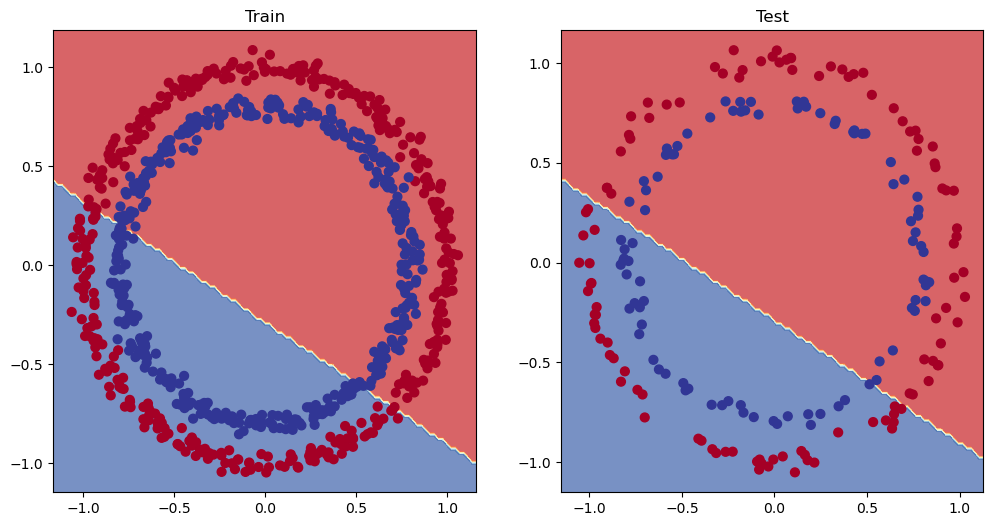

In [560]:
# Plot decision boundary of the model
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)

plt.title("Train")

plot_decision_boundary(model_0, X_train, y_train)

plt.subplot(1, 2, 2)

plt.title("Test")

plot_decision_boundary(model_0, X_test, y_test)